In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [42]:
df=pd.read_csv("D:\ECHO BRAINS\ML\Ecommerce Customers")
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [22]:
#here target variable is yearly amount spent, which is the last column in the dataset. We will use the other columns as features to predict the target variable.
#in above columns, we have the following features that we can use to predict the target variable yearly amount spent:
#1. Avg. Session Length
#2. Time on App
#3. Time on Website
#4. Length of Membership
#others are not useful for prediction as they are either categorical or not relevant to the target variable.

In [23]:
df.shape

(500, 8)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [25]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [26]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:

feautures = df.drop(['Email', 'Address', 'Avatar'], axis=1)
target = df['Yearly Amount Spent']
df=feautures



In [28]:
#above mean ans std values are very high, which indicates that there are some outliers in the dataset. We will remove the outliers using the IQR method.
#removing outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]



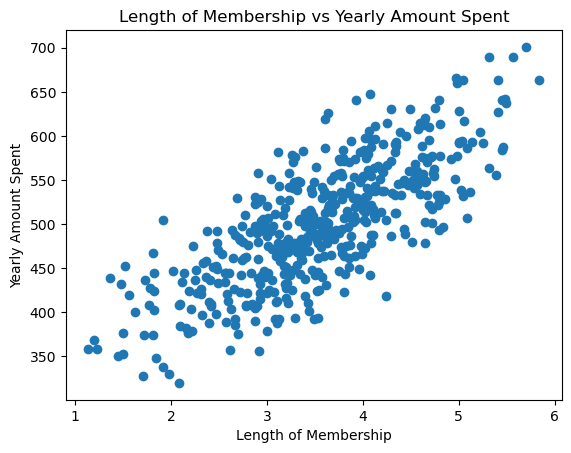

In [29]:
plt.scatter(df['Length of Membership'], df['Yearly Amount Spent'])
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Length of Membership vs Yearly Amount Spent')
plt.show()


In [30]:
#find the correlation between the features and the target variable
correlation = df.corr()
print(correlation['Yearly Amount Spent'].sort_values(ascending=False))





Yearly Amount Spent     1.000000
Length of Membership    0.767651
Time on App             0.475560
Avg. Session Length     0.339804
Time on Website         0.000581
Name: Yearly Amount Spent, dtype: float64


In [31]:
df.drop(['Time on Website'], axis=1)

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092
...,...,...,...,...
495,33.237660,13.566160,3.746573,573.847438
496,34.702529,11.695736,3.576526,529.049004
497,32.646777,11.499409,4.958264,551.620145
498,33.322501,12.391423,2.336485,456.469510


In [ ]:
x = df[['Length of Membership', 'Time on App', 'Avg. Session Length']]
y = df['Yearly Amount Spent']




In [ ]:
x_train, x_test, y_train, y_test= train_test_split(
    x, y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler #it is used for 

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#it is used 


In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)



In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)



MAE: 8.076147512988285
RMSE: 10.242979686230479
R2: 0.9789092310899179


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2')
print("CV R2 mean:", scores.mean())
#cv r2 used 



CV R2 mean: 0.9777454529721886


In [ ]:
train_r2 = model.score(x_train_scaled, y_train)
test_r2 = model.score(x_test_scaled, y_test)

print("Train R²:", train_r2)
print("Test R² :", test_r2)



Train R²: 0.9795171373476879
Test R² : 0.9789092310899179


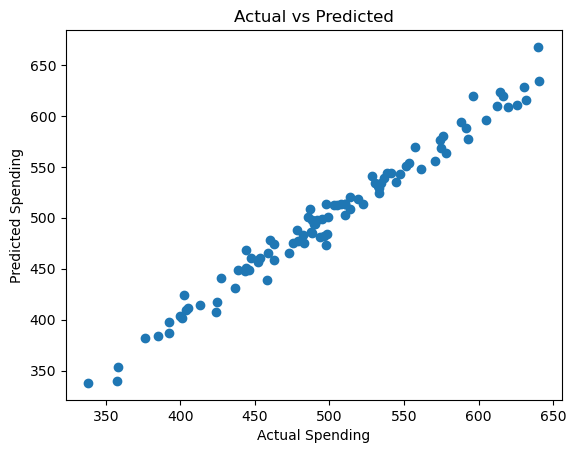

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Spending")
plt.ylabel("Predicted Spending")
plt.title("Actual vs Predicted")
plt.show()


In [ ]:
# New customer data
new_customer = [[4.2, 12.4, 34.2]]

# Scale input
new_customer_scaled = scaler.transform(new_customer)

# Predict
prediction = model.predict(new_customer_scaled)

print("Predicted Yearly Amount Spent:", prediction[0])


Predicted Yearly Amount Spent: 583.5609580424642


c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
mae = 8.07

print(f"Predicted Spend: {prediction[0]:.2f}")
print(f"Expected Range: {prediction[0]-mae:.2f} to {prediction[0]+mae:.2f}")



Predicted Spend: 1595.15
Expected Range: 1587.08 to 1603.22


In [ ]:
# pick one existing customer (for example, first one)
X_real = x_test.iloc[[0]] #it is used to select the first row of the x_test dataframe, which contains the features of the first customer in the test set. The double square brackets are used to keep the result as a DataFrame rather than converting it to a Series.
y_real = y_test.iloc[0]  #it is used to select the first value of the y_test series, which contains the target variable (yearly amount spent) for the first customer in the test set. The iloc[0] is used to access the first element of the series.
X_real_scaled = scaler.transform(X_real) #it is used to scale the features of the selected customer using the same scaler that was fitted on the training data. This ensures that the features are on the same scale as the data used to train the model.
y_pred = model.predict(X_real_scaled)[0] #it is used to predict the yearly amount spent for the selected customer using the trained model. The predict method returns an array, so we use [0] to get the first (and only) element of the array, which is the predicted value for that customer.



In [ ]:

print("Actual Yearly Amount Spent :", y_real)
print("Predicted Yearly Amount Spent:", y_pred)
print("Difference (Error):", abs(y_real - y_pred))


Actual Yearly Amount Spent : 510.50147847479735
Predicted Yearly Amount Spent: 513.8271988296549
Difference (Error): 3.3257203548575376
